# Phase 1 Project: Microsoft Movie Analysis

 * Name: Kezia Setokusumo
 * Pace: Flex, Oct 10 start 
 * Scheduled review: Dec 16 
 * Instructor: Mark Barbour 
 * [Blog](https://medium.com/@khs366/how-sql-became-a-ground-breaker-a0bfa03e704b)

---
## Overview and Business Problem
Microsoft is looking to enter the film making space and their next venture is to launch a movie studio. As part of their plans to break into the industry, Microsoft needs to conduct an initial data analysis of current competitors to determine the types of movies they should produce. Popular movies in recent years can be linked to certain genres and persons. Microsoft can leverage this type of data analysis as time goes by to gain an understanding of the public's current preferences to operate their movie-making business.

## The Data
Public databases from sources such as [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) can be leveraged to gain a better understanding of the type of movies that competitor studios are releasing. They contain relevant information such as release year, cast, genre, gross proceeds, and more. See an example of an IMDB entry from the TV series "Wednesday" [here](https://www.imdb.com/title/tt13443470/?ref_=hm_fanfav_tt_i_1_pd_fp1). See an example of a Box Office Mojo entry from the movie "Black Panther: Wakanda Forever" [here](https://www.boxofficemojo.com/release/rl3573908993/?ref_=bo_hm_rd).

The below codes extract relevant data from the aforementioned sources to deliver concrete business recommendations to Microsoft ahead of their movie studio launch.

## Methods
This project begins by analyzing basic facts about the movie, such as the typical run time in this case. The analysis then pivots to determine which studio has yeilded the most in total gross proceeds up to date - the purpose behind this is to understand which company is currently leading the space. From there, Microsoft can narrow their focus to study the type of movies genres that the leading studio produces most often. Lastly, this project identifies popular persons to provide Microsoft with an initial direction of who to involve in their projects.

## Results and Code
The following codes illustrate the methods used to synthesize and clean the information retrieved from external movie databases -- we begin by importing all the libraries and relevant files

In [1]:
# Import libraries and connect to SQLite database
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
fin_data=pd.read_csv('bom.movie_gross.csv')
con=sqlite3.connect('im.db')

### Movie Durations
Though this may seem like a minor detail, understanding typical movie durations is significant so that studios can structure their storyline to fit within a given timeframe in a way that captures the audience's attention

Text(0, 0.5, 'Frequency')

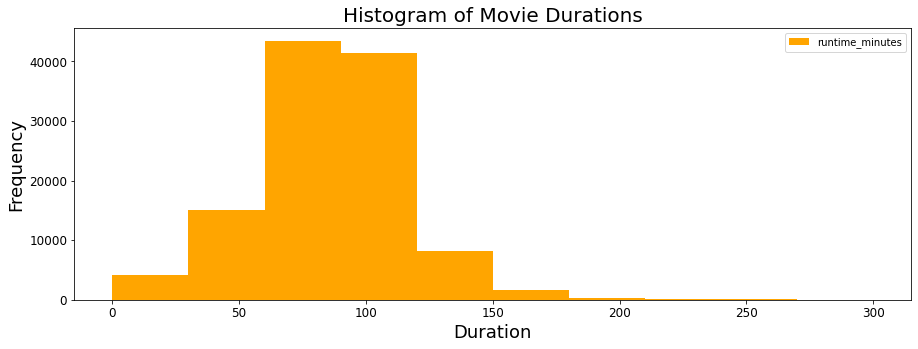

In [2]:
# Visualize duration data to get an idea of the typical length of a movie
rt_data=pd.read_sql("""SELECT runtime_minutes FROM movie_basics""", con)
rt_data=rt_data.dropna()
rt_data.plot.hist(bins=10, range=(0,300), figsize=(15,5), color='orange', fontsize=12)
plt.title("Histogram of Movie Durations", fontsize=20)
plt.xlabel("Duration", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

In [3]:
# Pull average runtime to understand the graph better
pd.read_sql("""SELECT AVG(runtime_minutes) FROM movie_basics""", con)

# Average value is 86.187247 minutes
print("Most of the movies have a runtime between 50-100 minutes, with the average runtime at around 86 minutes")

Most of the movies have a runtime between 50-100 minutes, with the average runtime at around 86 minutes


### Most financially successful studio based on gross proceeds
When entering a new industry, it makes sense to look at current players in the space alongside their financials to understand which company is performing well and to capitalize on competitive advantages that they may lack

In [4]:
# Display data from BOM showing gross proceeds
fin_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
# Clean data by replacing null values in domestic_gross and foreign_gross columns
fin_data['foreign_gross'].fillna(0, inplace=True)
fin_data['domestic_gross'].fillna(0, inplace=True)

# Spot check
fin_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [6]:
# Check data types of each column before continuing
print(fin_data.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [7]:
# Convert foreign_gross column into float; initial run had an error due to ',' separator
# Replace ',' so values can be converted into a float
fin_data.replace(',','', regex=True, inplace=True)
fin_data['foreign_gross']=fin_data['foreign_gross'].astype(float)

In [8]:
# Create new column with total gross proceeds
fin_data['total_gross']=fin_data['domestic_gross']+fin_data['foreign_gross']
fin_data['total_gross']=fin_data['total_gross'].astype('int64')

# Spot Check
fin_data

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000
3,Inception,WB,292600000.0,535700000.0,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6200
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4800
3384,El Pacto,Sony,2500.0,0.0,2018,2500
3385,The Swan,Synergetic,2400.0,0.0,2018,2400


In [9]:
# Determine how many movies each studio has produced
# Take value_counts() and turn its output into a dataframe
st_movies = fin_data['studio'].value_counts()
df_st_movies = pd.DataFrame(st_movies)
df_st_movies = df_st_movies.reset_index()
df_st_movies.columns = ['studio_name', 'total_movies_produced']
df_st_movies

,studio_name,total_movies_produced
0,IFC,166
1,Uni.,147
2,WB,140
3,Magn.,136
4,Fox,136
...,...,...
252,NAV,1
253,Gaum.,1
254,NFC,1
255,CLF,1


In [10]:
# Group the fin_data dataframe by studio and sum the total proceeds from each of its movies
grouped=fin_data.groupby('studio').sum('total_gross')

# Create a new dataframe by joining the fin_data dataframe with the df_st_movies dataframe
joined=grouped.join(df_st_movies.set_index("studio_name"))
joined=joined.drop('year', axis=1)
joined['avg_gross']=joined['total_gross']/joined['total_movies_produced']

# Change data type so the numbers are not displayed in scientific format
joined=joined.astype('int64')

# Sort the new dataframe by avg_gross
joined.sort_values('avg_gross', ascending=False)

,domestic_gross,foreign_gross,total_gross,total_movies_produced,avg_gross
studio,,,,,
HC,2700000,867600000,870300000,1,870300000
P/DW,1682900000,3393600000,5076500000,10,507650000
BV,18419029199,25793854700,44212883898,106,417102678
GrtIndia,20200000,234000000,254200000,1,254200000
WB (NL),3995699999,6339000000,10334699999,45,229659999
...,...,...,...,...,...
BSM,5100,0,5100,1,5100
TAFC,4600,0,4600,1,4600
Hiber,3600,0,3600,1,3600


In [11]:
# The above table shows that there are many studios which haven't produced many movies
# Microsoft is a big company with significant financial resources
# To ensure the data is more comprehensive, we only want to look at studios with a track record
# Create another table showing only the studios that have released 50 or more movies
joined2=joined.drop(joined[joined['total_movies_produced']<50].index)

# Sort the new dataframe by avg_gross
joined2=joined2.sort_values(by='avg_gross', ascending=False)

<AxesSubplot:xlabel='studio', ylabel='Average Gross Proceeds per Movie (in $100M)'>

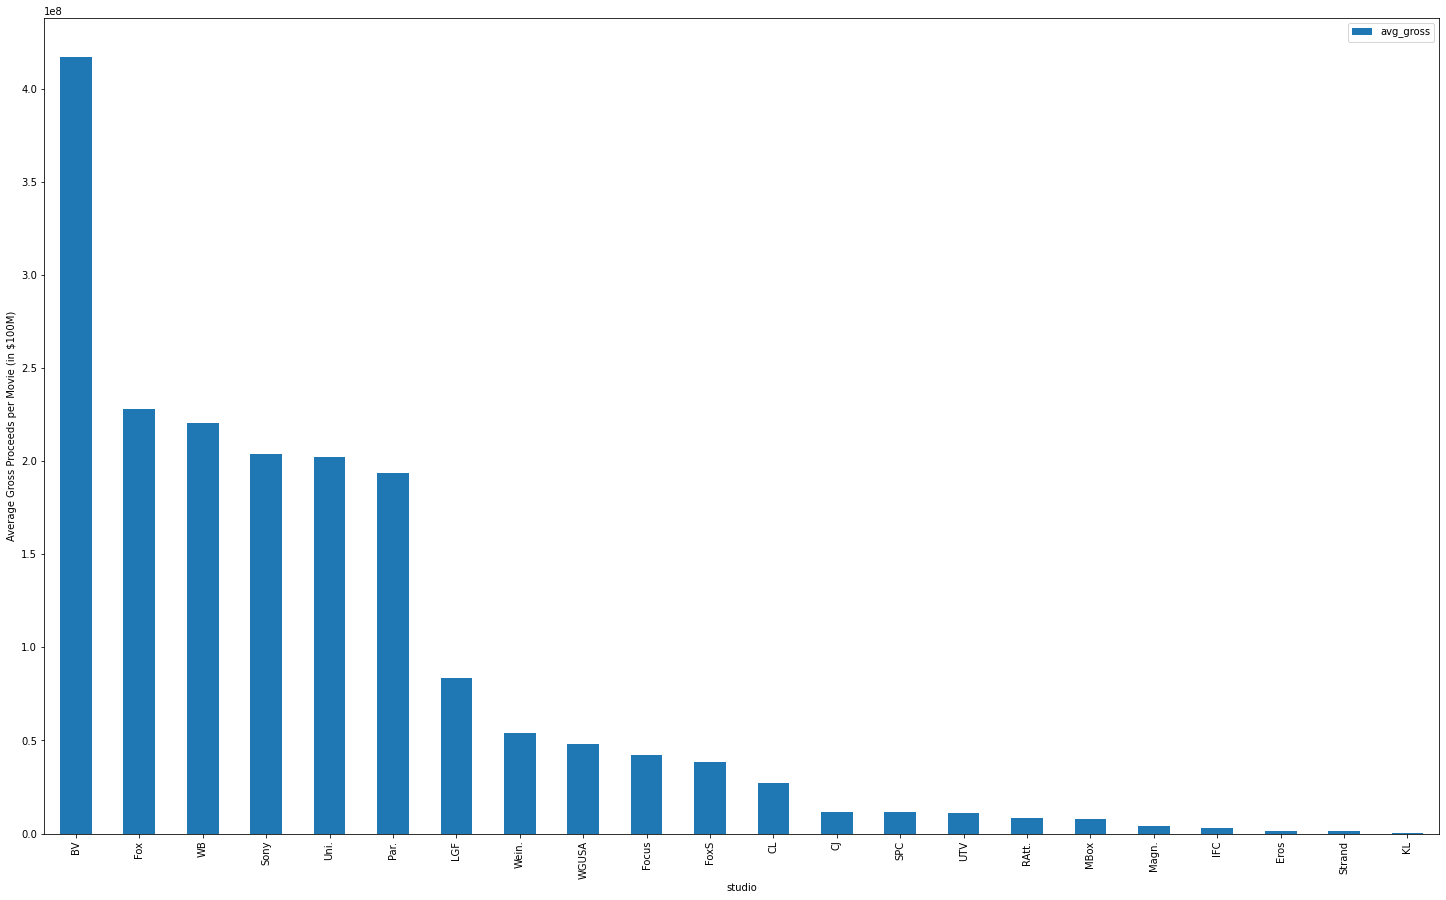

In [12]:
# Visualize the data
joined2.plot(y='avg_gross', ylabel= 'Average Gross Proceeds per Movie (in $100M)', kind='bar', figsize=(25,15))

Text(0.5, 0, 'Studio')

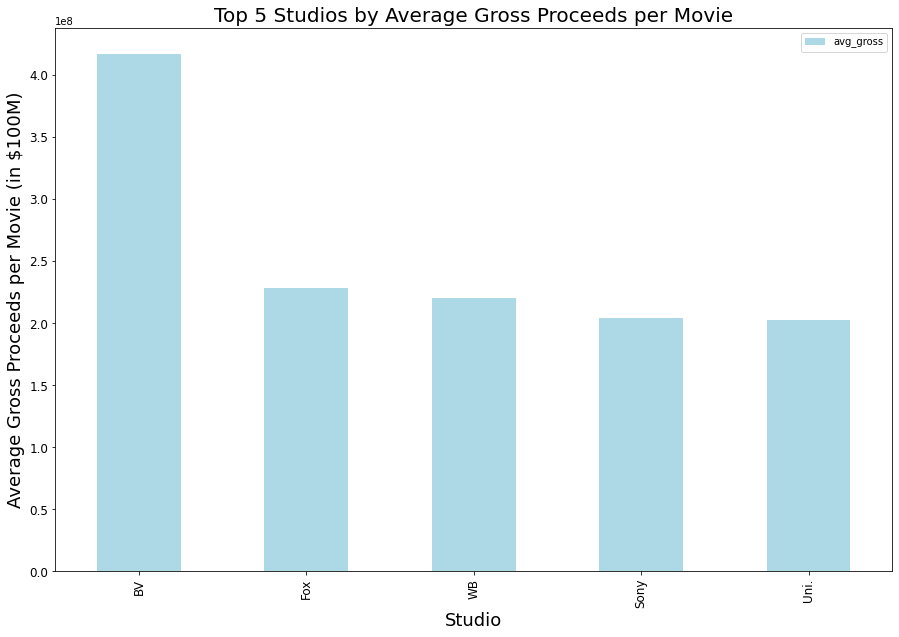

In [13]:
# Condense the previous graph to show the top 5, sorted, and emphasize BV studios' prominence
studioplot= joined2.head().plot(y='avg_gross', fontsize=12, kind='bar', figsize=(15,10), color='lightblue')

# Set axes titles and font size for improved readability 
studioplot.set_title("Top 5 Studios by Average Gross Proceeds per Movie", fontsize=20)
studioplot.set_ylabel("Average Gross Proceeds per Movie (in $100M)", fontsize=18)
studioplot.set_xlabel("Studio", fontsize=18)

In [14]:
print("The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal")

The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal


### Common genres released by the most active studio
Now that we know BV Studios generates the highest gross proceeds, it would be helpful to hone our focus onto the type of films they release

In [15]:
# Creating a dataframe of movies produced by BV studios, sorted by total_gross in descending order
bv_movies=fin_data[fin_data['studio']=='BV'].sort_values('total_gross', ascending=False)
bv_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900000
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400000
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347000000
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600000
1127,Frozen,BV,400700000.0,875700000.0,2013,1276400000
...,...,...,...,...,...,...
889,People Like Us,BV,12400000.0,0.0,2012,12400000
2499,Queen of Katwe,BV,8900000.0,1500000.0,2016,10400000
512,Prom,BV,10100000.0,0.0,2011,10100000
1297,The Fifth Estate,BV,3300000.0,5300000.0,2013,8600000


In [16]:
# Passing the BV movie titles into a list
titles=list(bv_movies['title'])
titles

["Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok',
 'Coco',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Guardians of the Galaxy',
 'Maleficent',
 'Monsters University',
 'Captain America: The Winter Soldier',
 'Avengers: Infinity War',
 'Doctor Strange',
 'Big Hero 6',
 'Thor: The Dark World',
 'Moana',
 'Ant-Man and the Wasp',
 'Tangled',
 'Cars 2',
 'Cinderella (2015)',
 'Brave',
 'Ralph Breaks the Internet',
 'Ant-Man',
 'Oz The Great and Powerful',
 'Wreck-It Ralph',
 'Tron Legacy',
 'Solo: A Star Wars Story',
 'Cars 3',
 'Mary Poppins

In [17]:
# Use the list of BV movie titles to extract BV movies that are published in IMDB's database
# Look at the IMDB movie_basics table
# Exclude entries with null values
query1=pd.read_sql('''SELECT * FROM movie_basics WHERE primary_title IN ("Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok',
 'Coco',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Guardians of the Galaxy',
 'Maleficent',
 'Monsters University',
 'Captain America: The Winter Soldier',
 'Avengers: Infinity War',
 'Doctor Strange',
 'Big Hero 6',
 'Thor: The Dark World',
 'Moana',
 'Ant-Man and the Wasp',
 'Tangled',
 'Cars 2',
 'Cinderella (2015)',
 'Brave',
 'Ralph Breaks the Internet',
 'Ant-Man',
 'Oz The Great and Powerful',
 'Wreck-It Ralph',
 'Tron Legacy',
 'Solo: A Star Wars Story',
 'Cars 3',
 'Mary Poppins Returns',
 'Prince of Persia: The Sands of Time',
 'The Good Dinosaur',
 'Alice Through the Looking Glass',
 'Real Steel',
 'John Carter',
 'Lincoln',
 'The Lone Ranger',
 'Planes',
 'The Help',
 "The Sorcerer's Apprentice",
 'Into the Woods',
 'Tomorrowland',
 'Need for Speed',
 "Disney's Christopher Robin",
 'Gnomeo and Juliet',
 'The Lion King (in 3D)',
 'The BFG',
 'War Horse',
 'The Nutcracker and the Four Realms',
 'Bridge of Spies',
 'The Muppets',
 'Step Up 3-D',
 'Planes: Fire & Rescue',
 'I Am Number Four',
 'The Secret World of Arrietty',
 "Pete's Dragon (2016)",
 'A Wrinkle in Time',
 'Saving Mr. Banks',
 'The Wind Rises',
 'Alexander and the Terrible Horrible No Good Very Bad Day',
 'The Last Song',
 'The Hundred-Foot Journey',
 'Oceans',
 'Frankenweenie',
 'Muppets Most Wanted',
 'Finding Nemo (3D)',
 'Tales from Earthsea',
 'Beauty and the Beast (3D)',
 'Secretariat',
 'The Odd Life of Timothy Green',
 'The Finest Hours',
 'Monsters Inc. (3D)',
 'Delivery Man',
 'Winnie the Pooh',
 'McFarland USA',
 'When in Rome',
 'Fright Night (2011)',
 'Million Dollar Arm',
 'Mars Needs Moms',
 'Chimpanzee',
 'You Again',
 'African Cats',
 'The Light Between Oceans',
 'Born in China',
 'Bears',
 'Monkey Kingdom',
 'Strange Magic',
 'People Like Us',
 'Queen of Katwe',
 'Prom',
 'The Fifth Estate',
 'Waking Sleeping Beauty')
 AND runtime_minutes IS NOT NULL AND genres IS NOT NULL''', con)
query1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy"
1,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi"
2,tt0433035,Real Steel,Real Steel,2011,127.0,"Action,Drama,Family"
3,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
4,tt0443272,Lincoln,Lincoln,2012,150.0,"Biography,Drama,History"
...,...,...,...,...,...,...
89,tt5095030,Ant-Man and the Wasp,Ant-Man and the Wasp,2018,118.0,"Action,Adventure,Comedy"
90,tt5523010,The Nutcracker and the Four Realms,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy"
91,tt5848272,Ralph Breaks the Internet,Ralph Breaks the Internet,2018,112.0,"Adventure,Animation,Comedy"
92,tt7002100,Coco,Coco,2017,98.0,Horror


In [18]:
# Pass query1 into a dataframe for visualization later
df=pd.DataFrame(query1)

# Create a new sub dataframe that takes the unique genre combinations of BV movies and returns the count/frequency
bv_genres = df['genres'].value_counts()
df_bv_genres = pd.DataFrame(bv_genres)
df_bv_genres = df_bv_genres.reset_index()
df_bv_genres.columns = ['genres', 'count']
df_bv_genres

,genres,count
0,"Adventure,Animation,Comedy",19
1,"Action,Adventure,Sci-Fi",9
2,"Action,Adventure,Fantasy",7
3,Documentary,6
4,"Action,Adventure,Comedy",5
5,"Adventure,Family,Fantasy",4
6,"Comedy,Drama",3
7,"Action,Adventure,Family",3
8,"Action,Adventure,Animation",2
9,"Adventure,Animation,Family",2


Text(0.5, 1.0, 'Frequency of Genre Combinations in Movies Produced by BV Studios')

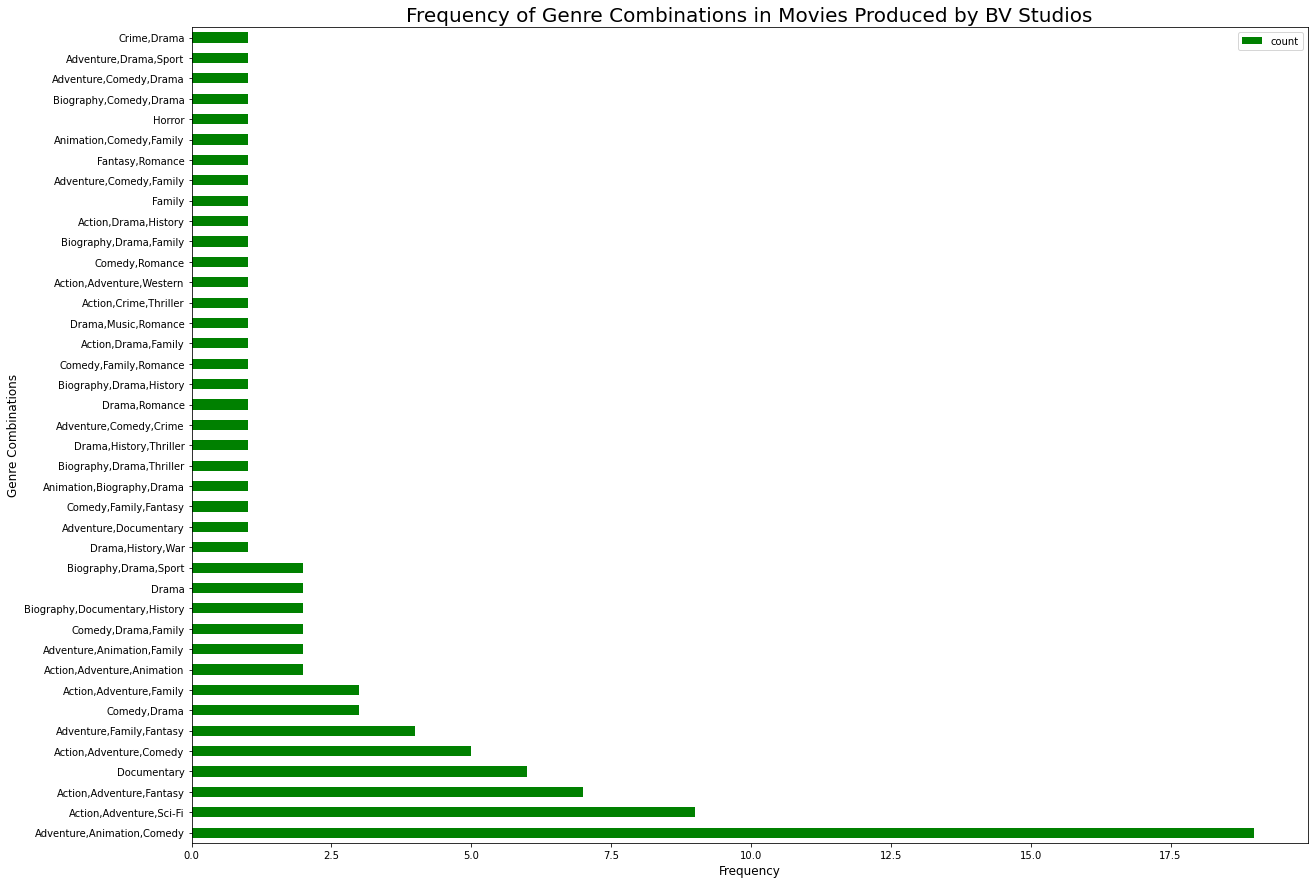

In [19]:
# Visualize the dataframe to determine the most common genre combination for BV movies
df_bv_genres.plot(x='genres', y='count', kind='barh', figsize=(20,15), color='green')
plt.xlabel('Frequency', size=12)
plt.ylabel('Genre Combinations', size=12)
plt.title('Frequency of Genre Combinations in Movies Produced by BV Studios', size=20)

Text(0.5, 1.0, 'Frequency of Genre Combinations in Movies Produced by BV Studios')

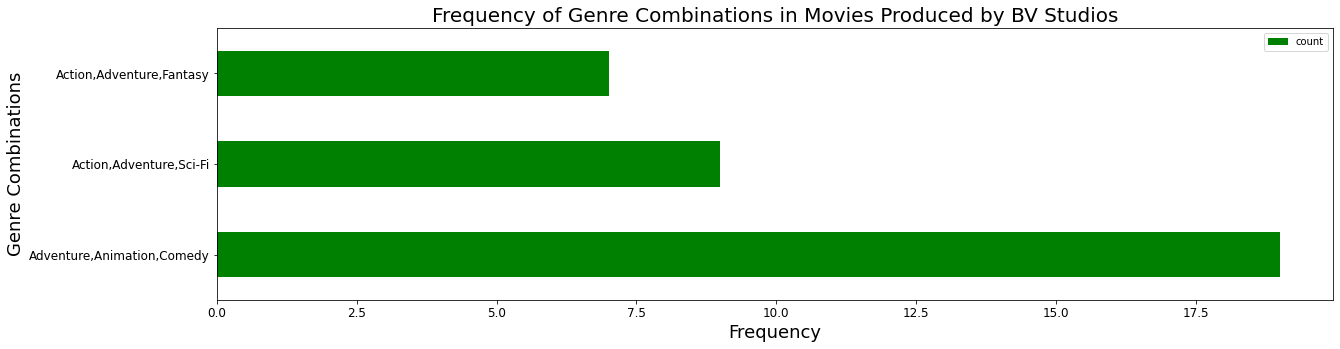

In [20]:
# Present the above visualization to emphasize the top 3 genre combinations
df_bv_genres.head(3).plot(x='genres', y='count', kind='barh', figsize=(20,5), color='green', fontsize=12)
plt.xlabel('Frequency', size=18)
plt.ylabel('Genre Combinations', size=18)
plt.title('Frequency of Genre Combinations in Movies Produced by BV Studios', size=20)

In [21]:
# Print conclusion from the graph
print("The top three genre combinations in movies produced by BV studios are:\n Adventure/Animation/Comedy\n Action/Adventure/Sci-Fi\n Action/Adventure/Fantasy")

The top three genre combinations in movies produced by BV studios are:
 Adventure/Animation/Comedy
 Action/Adventure/Sci-Fi
 Action/Adventure/Fantasy


### Successful crew in show business
When we think of movies, we often think of the famous cast members; however, the production crew is just as important - fortunately, IMDB records that data which allows us to look at who's behind the camera in successful movies

In [22]:
# Now we have a good initial understanding of the movie's fundamentals such as average runtime and popular genres
# Can also look at people such as actors, directors, and producers who are associated with successful movies
# Create another query of popular persons ordered by average rating and total votes
# Use multiple joins to combine persons, known_for, movie_basics, and movie_ratings table from the IMDB database
query2=pd.read_sql("""SELECT p.primary_name, mr.averagerating, mr.numvotes FROM persons p
                    JOIN known_for k
                    ON k.person_id=p.person_id
                    JOIN movie_basics mb 
                    ON mb.movie_id=k.movie_id
                    JOIN movie_ratings mr
                    ON mr.movie_id=mb.movie_id
                    GROUP BY primary_name
                    ORDER BY averagerating DESC, numvotes DESC""", con)

# Pass query2 into dataframe for visualization later
df_people=pd.DataFrame(query2)
df_people

,primary_name,averagerating,numvotes
0,Brian Baucum,10.0,8
1,Loreto Di Cesare,10.0,8
2,Paul Greive,10.0,8
3,Lindsay Thompson,10.0,7
4,Ahad Fattahi,10.0,6
...,...,...,...
333889,P. Prem Anand Pillai,1.0,5
333890,Paula Stein,1.0,5
333891,Roberto Attolini,1.0,5
333892,Sheril Aida,1.0,5


Text(0, 0.5, 'Rating / Number of Votes')

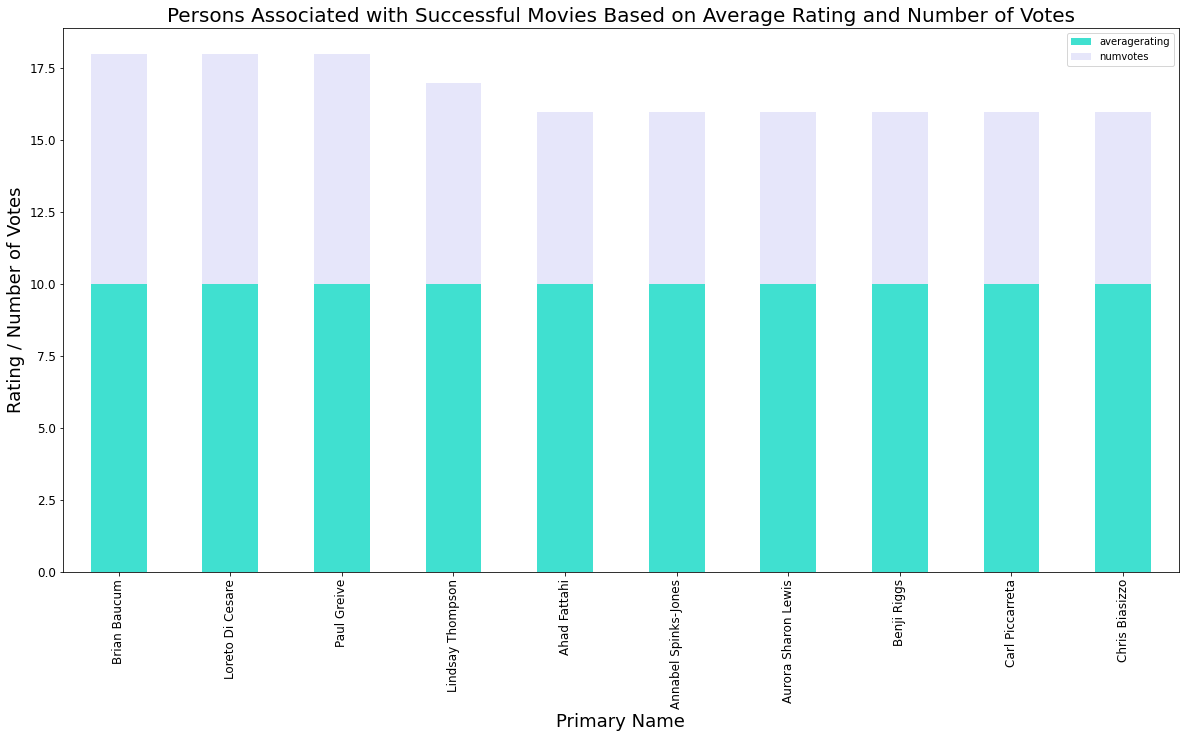

In [23]:
# Visualize the dataframe showing top 10 popular persons
ax2=df_people.head(10).plot('primary_name', kind='bar', stacked=True, color=['turquoise', 'lavender'], figsize=(20,10), fontsize=12)
ax2.set_title('Persons Associated with Successful Movies Based on Average Rating and Number of Votes', fontsize=20)
ax2.set_xlabel('Primary Name', fontsize=18)
ax2.set_ylabel('Rating / Number of Votes', fontsize=18)

In [24]:
print("Microsoft can use the above data and visualization when deciding who to hire for their movie projects")

Microsoft can use the above data and visualization when deciding who to hire for their movie projects


--- 
## Conclusions / Recommendations
The data analysis process yields several insights:
* Microsoft should keep their movie run times consistent with or near the industry average, ideally between 80-100 minutes
* Microsoft can leverage BV Studio's best practices, especially focusing on developing successful movies in action and adventure
* When people think of movies, they often only remember famous cast members, however, selecting the crew behind the camera is just as important - Microsoft can start by considering individuals such as Brian Baucum, Loreto Di Cesare, and Paul Greive, among others

## Data Considerations and Limitations
For further exploration as Microsoft builds out their studio, the following can be considered:
* Look at the available budget and compare it to gross proceeds, as some companies have more resources than others
* Conduct data analysis of which type of movies have been popular during different years, as public preferences often change
* Much of a movie's success is also due to how well it's remembered - future data analysis can also look at how long a movie was being showed since release or how many replays a movie received on streaming platforms like Netflix/Hulu

## Additional Information
A summary of findings can be found in this [deliverable](https://github.com/keziasetokusumo/p1_project/blob/master/p1_project_deliverable.pdf)